In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Knia2o8xrwUsnw8AoH1I")
project = rf.workspace("personal-projects-jfbag").project("nails_segmentation")
version = project.version(31)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 945.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

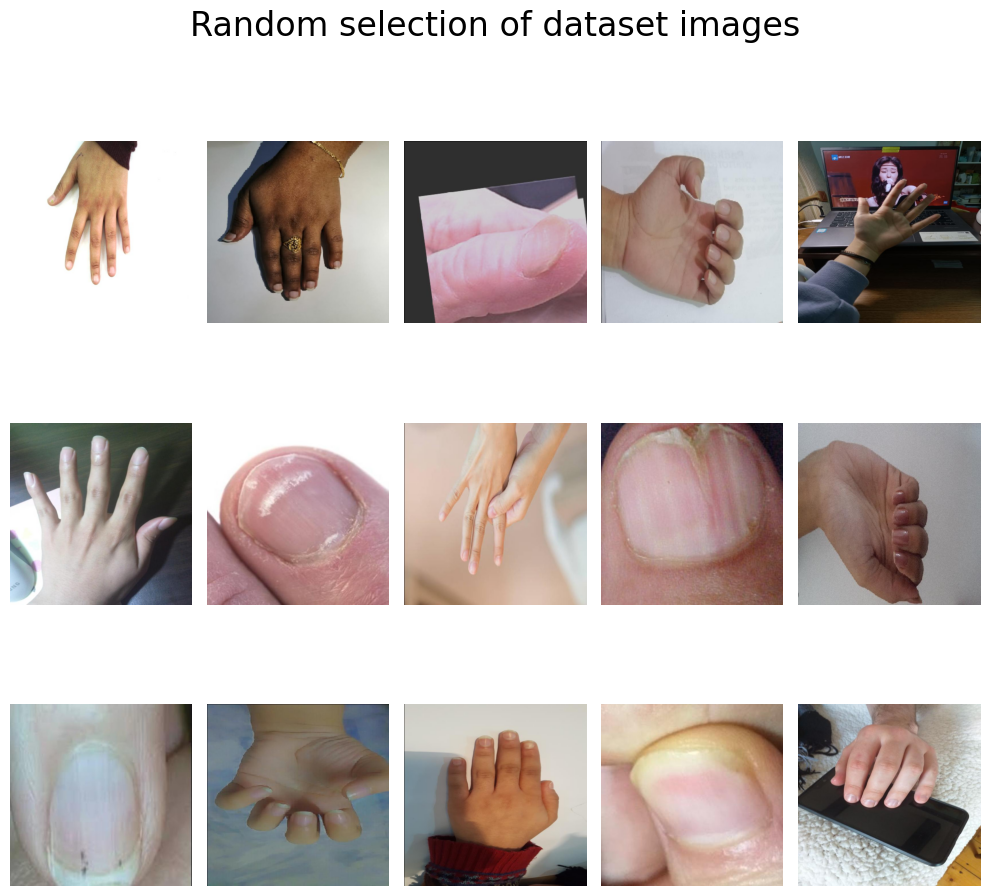

In [ ]:
# !pip install matplotlib
!pip install ultralytics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

dataset_path = '/content/nails_segmentation-31'

train_image_path = os.path.join(dataset_path, 'train', 'images')

imageFiles = [f for f in os.listdir(train_image_path) if f.endswith('.jpg')]

randomImages = random.sample(imageFiles, 15)
plt.figure(figsize=(10, 10))
for i, Image_file in enumerate(randomImages):

  image_path = os.path.join(train_image_path, Image_file)
  image = Image.open(image_path)
  plt.subplot (3, 5, i+1)
  plt.imshow(image)
  plt.axis('off')

plt.suptitle('Random selection of dataset images', fontsize=24)
plt.tight_layout ()
plt.show()

In [2]:
# !cd ..
!pip install ultralytics
from ultralytics import YOLO


model = YOLO('yolov8n-seg.pt')
dataset_path = '/content/nails_segmentation-31/data.yaml'

# yamlFilePath = os.path.join(dataset_path, 'data.yaml')

results = model.train(
    data=dataset_path,
    epochs=17,
    batch=64,
    imgsz=400
    #optimizer='auto',
    #lr0=0.0001,
    #lrf=0.01,
    #dropout=0.25,
    #seed=42
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

100%|██████████| 6.73M/6.73M [00:00<00:00, 87.8MB/s]


Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/nails_segmentation-31/data.yaml, epochs=17, time=None, patience=100, batch=64, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

RuntimeError: Dataset '/content/nails_segmentation-31/data.yaml' error ❌ '/content/nails_segmentation-31/data.yaml' does not exist


image 1/1 /content/nails_segmentation-31/valid/images/-146-_jpg.rf.e1573183298fc62abe9b9c286f47a2ad.jpg: 224x224 6 Nails, 90.5ms
Speed: 1.2ms preprocess, 90.5ms inference, 6.9ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/nails_segmentation-31/valid/images/1011_png.rf.5c0d307c2a662e012d618c233f3e1e7b.jpg: 224x224 4 Nails, 54.9ms
Speed: 0.9ms preprocess, 54.9ms inference, 4.8ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/nails_segmentation-31/valid/images/1078_png.rf.470f40071dca390c3f1b1d41a9f3020d.jpg: 224x224 2 Nails, 51.6ms
Speed: 1.0ms preprocess, 51.6ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/nails_segmentation-31/valid/images/1_png.rf.3f6cd5cb9882f07bc13aa1fe3581836b.jpg: 224x224 5 Nails, 52.4ms
Speed: 0.9ms preprocess, 52.4ms inference, 3.6ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/nails_segmentation-31/valid/images/pexels-photo-12521117_jpeg.rf.57236707a3405

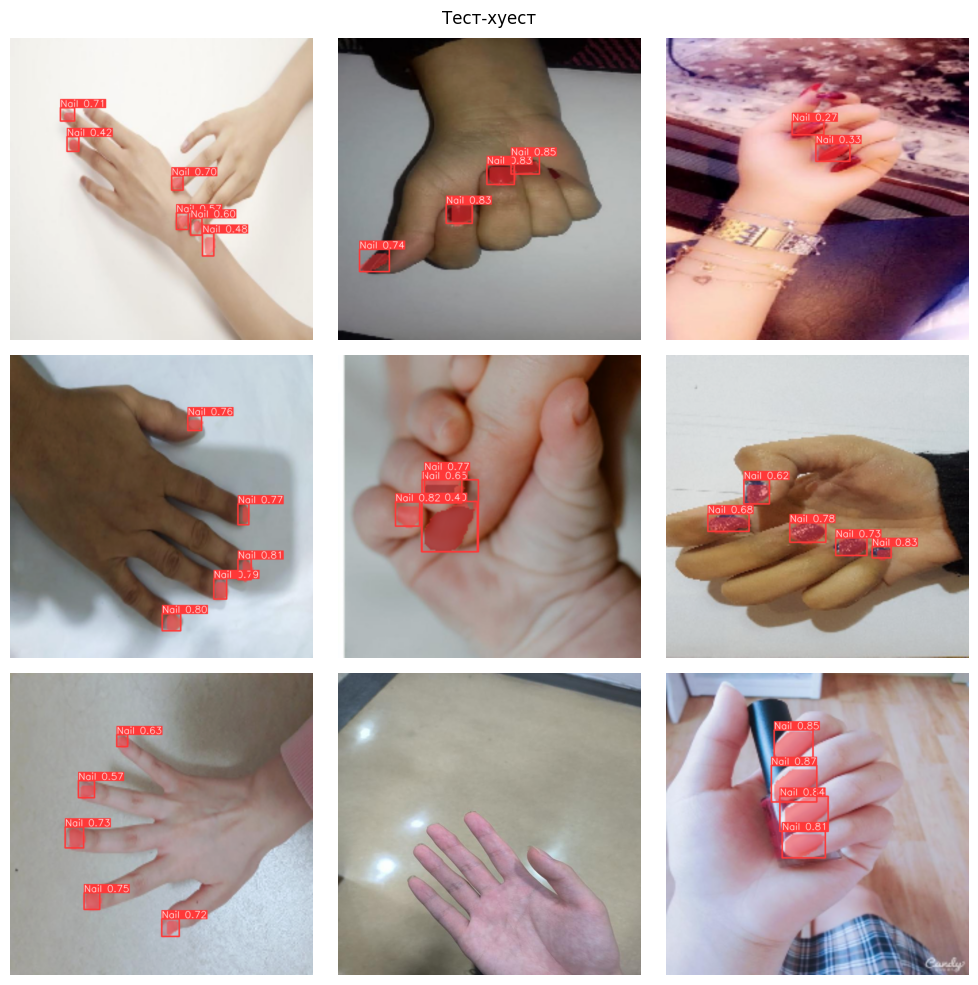

In [ ]:
bestModelpath = '/content/runs/segment/train24/weights/best.pt'
bestmodel = YOLO(bestModelpath)

dataset_path_dir = '/content/nails_segmentation-31/'

validImagePath = os.path.join(dataset_path_dir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Тест-хуест')

# randomImages = random.sample(imageFiles, 15)
# plt.figure(figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):

  image_path = os.path.join(validImagePath, selectedImage[i])
  results = bestmodel.predict(source=image_path, imgsz=224)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  # image = Image.open(image_path)
  # plt.subplot (3, 5, i+1)
  # plt.imshow(image)
  # plt.axis('off')
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

# plt.suptitle('Random selection of dataset images', fontsize=24)
plt.tight_layout ()
plt.show()


WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_boxes' instead.

image 1/1 /content/111.jpg: 224x192 5 Nails, 42.5ms
Speed: 0.8ms preprocess, 42.5ms inference, 3.1ms postprocess per image at shape (1, 3, 224, 192)
Results saved to runs/segment/predict6


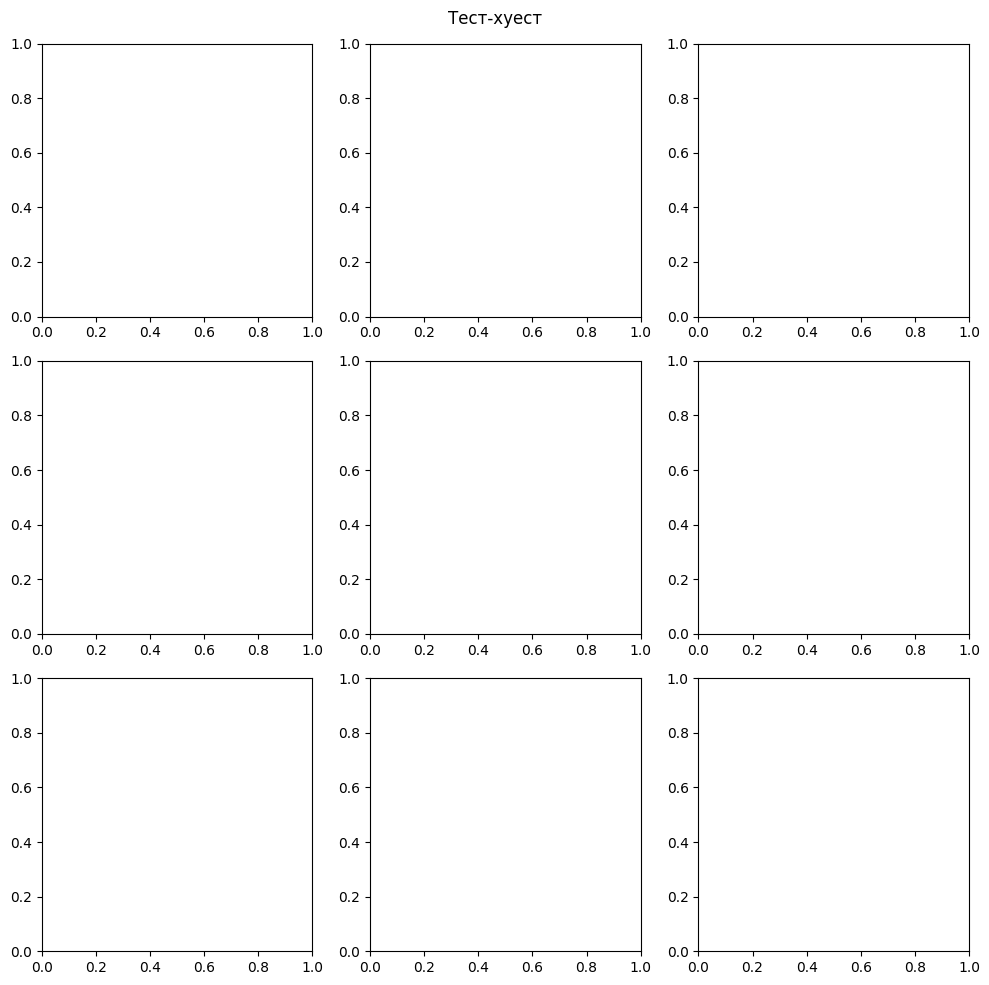

In [ ]:
# !pip install ultralytics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random
from pathlib import Path

bestModelpath = '/content/best.pt'
bestmodel = YOLO(bestModelpath)
# from PIL import Image

# dataset_path_dir = '/content/nails_segmentation-31/'

# validImagePath = os.path.join(dataset_path_dir, 'valid', 'images')

# imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

# numImages = len(imageFiles)
# selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Тест-хуест')

# randomImages = random.sample(imageFiles, 15)
# plt.figure(figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
  image_path = os.path.join('/content/', '111.jpg')
  results = bestmodel.predict(source=image_path, show_boxes=False, imgsz=224, save=True)
  annotatedImage = results[0].masks.numpy()
  # annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  # j = Image.
  # j.save(dataset_path_dir, "1313.jpg")
  # res = model('111.jpg', save=True)
  mask = annotatedImage[0]  # For multi-class, iterate over masks
  # Save the mask
  # cv2.imwrite('/content/segmented_mask.png', mask * 255)
  for r in results:
    img = np.copy(r.orig_img)
    img_name = Path(r.path).stem

    # iterate each object contour
    for ci,c in enumerate(r):
        label = c.names[c.boxes.cls.tolist().pop()]

        b_mask = np.zeros(img.shape[:2], np.uint8)

        # Create contour mask
        contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
        _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)


        mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
        isolated = cv2.bitwise_and(mask3ch, img)

        # OPTIONAL: detection crop (from either OPT1 or OPT2)
        x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)
        iso_crop = isolated[y1:y2, x1:x2]

        # Save the isolated object
        _ = cv2.imwrite(f'/content/{img_name}.jpg', iso_crop)
  break
  ax.imshow(annotatedImageRGB)
  ax.axis('off')
  plt.tight_layout ()
  plt.show()
  break

# # for i, ax in enumerate(axes.flatten()):

#   image_path = os.path.join(validImagePath, selectedImage[i])
#   results = bestmodel.predict(source=image_path, imgsz=224)
#   annotatedImage = results[0].plot()
#   annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
#   # image = Image.open(image_path)
#   # plt.subplot (3, 5, i+1)
#   # plt.imshow(image)
#   # plt.axis('off')
#   ax.imshow(annotatedImageRGB)
#   ax.axis('off')

# plt.suptitle('Random selection of dataset images', fontsize=24)
plt.tight_layout ()
plt.show()

In [ ]:
# !pip install ultralytics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random
from pathlib import Path

bestModelpath = '/content/best.pt'
# bestmodel = YOLO(bestModelpath)
# from PIL import Image

# dataset_path_dir = '/content/nails_segmentation-31/'

# validImagePath = os.path.join(dataset_path_dir, 'valid', 'images')

# imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

# numImages = len(imageFiles)
# selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

# fig, axes = plt.subplots(3, 3, figsize=(10, 10))
# fig.suptitle('Тест-хуест')

m = YOLO(bestModelpath)
image_path = os.path.join('/content/', '121212.jpg')
res = m.predict(source=image_path, show_boxes=False)

# img = (res[0].cpu().masks.data[0].numpy() * 255).astype("uint8") # параметр *255 указывает на то, что цвет маски черный

height,width = img.shape

masked = np.zeros((height, width), dtype="uint8")
num_masks = len(res[0].cpu().masks.data)
for i in range(num_masks):
    masked = cv2.add(masked,(res[0].cpu().masks.data[i].numpy() * 255).astype("uint8"))
cv2.imwrite(f'1488_.png', masked)

exit
# iterate detection results
for r in res:
    img = np.copy(r.orig_img)
    img_name = Path(r.path).stem

    b_mask = np.zeros(img.shape[:2], np.uint8)

    contour = r.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
    _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)
    _ = cv2.imwrite(f'{img_name}_{r}.png', _)


#     img = (results[0].cpu().masks.data[0].numpy() * 255).astype("uint8")

# height,width = img.shape

# masked = np.zeros((height, width), dtype="uint8")
# num_masks = len(results[0].cpu().masks.data)
# for i in range(num_masks):
#     masked = cv2.add(masked,(results[0].cpu().masks.data[i].numpy() * 255).astype("uint8"))
    # iterate each object contour
    # for ci,c in enumerate(r):
    #     label = c.names[c.boxes.cls.tolist().pop()]

    #     b_mask = np.zeros(img.shape[:2], np.uint8)

    #     # Create contour mask
    #     contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
    #     _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)
    #     _ = cv2.imwrite(f'{img_name}_{label}-{ci}.png', _)
        # Choose one:

        # OPTION-1: Isolate object with black background
        # mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
        # isolated = cv2.bitwise_and(mask3ch, img)
        # isolated.item.

        # OPTION-2: Isolate object with transparent background (when saved as PNG)
        # isolated = np.dstack([img, b_mask])

        # OPTIONAL: detection crop (from either OPT1 or OPT2)
        # x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)
        # iso_crop = isolated[y1:y2, x1:x2]

        # TODO your actions go here


image 1/1 /content/121212.jpg: 192x224 4 Nails, 51.4ms
Speed: 1.2ms preprocess, 51.4ms inference, 2.9ms postprocess per image at shape (1, 3, 192, 224)
